# NB_160124T0725_linear_regression_scratch

# 1. Imports

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

# 2. Implementation of the class LinearRegressor

- about `np.dot`
  - The dot product requires that the dimensions of the arrays are aligned such that the size of the last axis of the first array matches the size of the second-to-last axis of the second array. In simpler terms, for 2D arrays (matrices), the number of columns in the first matrix must equal the number of rows in the second matrix.

In [27]:
class LinearRegression:
    def __init__(self, learnint_rate=0.01, num_iter=100):
        self.lr = learnint_rate
        self.num_iter = num_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iter):
            # forward pass
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute error
            error = y_predicted - y

            # backward pass
            # compute gradient
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            if _ % 10 == 0:
                print(f"iteration: {_}, mse: {self.mse(X, y)=}")

    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        return y_hat

    def mse(self, X, y):
        y_hat = self.predict(X)
        mse_result = np.mean((y_hat - y) ** 2)
        return mse_result

# 3.Load data

X_train.shape=(80, 1), y_train.shape=(80,), type(X_train)=<class 'numpy.ndarray'>, type(y_train)=<class 'numpy.ndarray'>


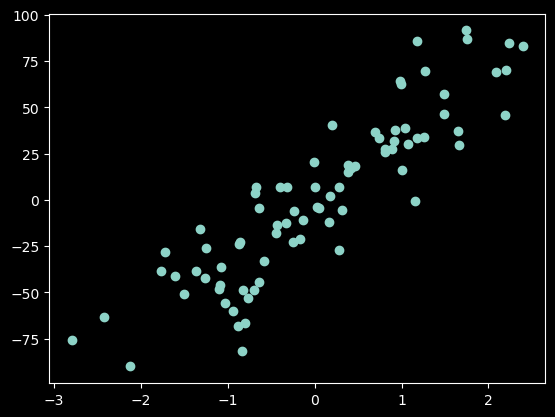

In [25]:
# 2. Load the data
X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=123
)

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print(
    f"{X_train.shape=}, {y_train.shape=}, {type(X_train)=}, {type(y_train)=}"
)
plt.scatter(X_train[:, 0], y_train)
plt.show()

# 4.Use the model

- fit the model

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

iteration: 0, mse: self.mse(X, y)=1913.1585051524125
iteration: 10, mse: self.mse(X, y)=1547.4227873675186
iteration: 20, mse: self.mse(X, y)=1269.57807685092
iteration: 30, mse: self.mse(X, y)=1058.4884725708955
iteration: 40, mse: self.mse(X, y)=898.1034461777774
iteration: 50, mse: self.mse(X, y)=776.2338041816207
iteration: 60, mse: self.mse(X, y)=683.6223601390539
iteration: 70, mse: self.mse(X, y)=613.238344165347
iteration: 80, mse: self.mse(X, y)=559.7416717287288
iteration: 90, mse: self.mse(X, y)=519.076170355009


- predict with the model

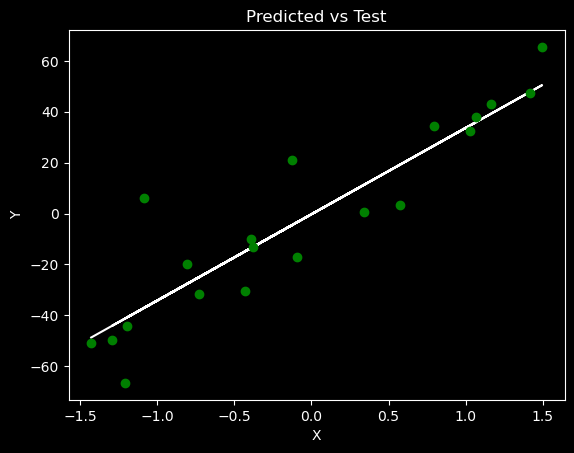

In [22]:
y_predicted = regressor.predict(X_test)

plt.plot(X_test, y_predicted, color="white")
plt.plot(X_test, y_test, "o", color="green")
plt.title("Predicted vs Test")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 5.For practising